In [1]:
import pandas as pd
%pylab inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the data from the disk into memory
data= pd.read_csv("RedditSurveyData.csv.csv")

In [3]:
del df['Unnamed: 14']
del df['Unnamed: 15']
del df['Unnamed: 16']
del df['Unnamed: 17']
del df['Unnamed: 18']
del df['Unnamed: 19']

df.columns

In [4]:
data

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


In [5]:
data.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [6]:
data.shape

(32754, 14)

In [7]:
data.columns = ['Id','Gender','AgeGroup','MaritialStatus','EmpStatus','InMilitaryService','HasKids','Education','Country','State','HouseholdIncome','SubReddit','DogOrCat','Cheese']

In [8]:
#Gender classification
data.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [9]:
#Age classification
data.AgeGroup.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: AgeGroup, dtype: int64

In [10]:
#Employment status classification
data.EmpStatus.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: EmpStatus, dtype: int64

In [11]:
#Maritial status classification
data.MaritialStatus.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: MaritialStatus, dtype: int64

In [12]:
data.MaritialStatus.replace('Blank','Single',inplace=True)

In [13]:
data[data.MaritialStatus=='Married/civil union/domestic partnership'].AgeGroup.value_counts()

25-34          3296
35-44          1344
18-24           431
45-54           306
55-64            88
65 or Above      16
Under 18          6
None              3
Name: AgeGroup, dtype: int64

In [14]:
data[data.AgeGroup.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,State,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [15]:
dataDict = data.to_dict()

In [16]:
#Drop US states
data.drop(data.columns[9],axis=1,inplace=True)

In [17]:
#for index in range(0,data.shape[0]):
#    if 'united states' in data.Country[index].lower() or 'ameri' in data.Country[index].lower():
#        data.Country[index] = 'America'

In [18]:
#Replace None value with Male
data.Gender.replace('None','Male',inplace=True)

In [19]:
data.Gender.value_counts()

Male      26619
Female     6135
Name: Gender, dtype: int64

In [20]:
#Replace None in EmpStatus by Not employed, but looking for work
data.EmpStatus.replace('None','Not employed, but looking for work',inplace=True)

In [21]:
data.EmpStatus.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2238
Freelance                                 1948
Not employed and not looking for work      682
Retired                                     85
Name: EmpStatus, dtype: int64

In [22]:
#Replace None value with 25-34
data.AgeGroup.replace('None','25-34',inplace=True)

In [23]:
data.HasKids.value_counts()

No      27488
Yes      5047
None      219
Name: HasKids, dtype: int64

In [24]:
data.HasKids.replace('None','No',inplace=True)

In [25]:
data[data.Education.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [26]:
data[data.EmpStatus.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [27]:
data[data.AgeGroup.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [28]:
data[data.MaritialStatus.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [29]:
data[data.InMilitaryService.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [30]:
data[data.HasKids.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [31]:
data[data.Country.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [32]:
data[data.HouseholdIncome.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [33]:
data[data.SubReddit.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,"$70,000 - $99,999",NaN,I like cats.,Munster
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,"Under $20,000",NaN,I like cats.,Swiss
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,United States,none,NaN,I like dogs.,American
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United States,"$70,000 - $99,999",NaN,I like cats.,Provolone
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,romania,"$20,000 - $29,999",NaN,I like cats.,Other
75,76,Male,35-44,Single,Freelance,No,No,Some college,United Kingdom,"$70,000 - $99,999",NaN,I like cats.,Other
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,United States,"$40,000 - $49,999",NaN,I like cats.,Brie
89,90,Male,18-24,Single,Student,No,No,Some college,United States,"$150,000 or more",NaN,I like cats.,Brie
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,United States,"$20,000 - $29,999",NaN,I like dogs.,Goat
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,United States,"Under $20,000",NaN,I like turtles.,Goat


In [34]:
data.SubReddit.replace(NaN,'Missing',inplace=True)

In [35]:
data[data.SubReddit.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [36]:
data[data.DogOrCat.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,none,DROP TABLE `users`,NaN,1
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming')


In [37]:
data.DogOrCat.replace(NaN,'Dog',inplace=True)

In [38]:
data[data.DogOrCat.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [39]:
data[data.Cheese.isnull()]

,Id,Gender,AgeGroup,MaritialStatus,EmpStatus,InMilitaryService,HasKids,Education,Country,HouseholdIncome,SubReddit,DogOrCat,Cheese


In [40]:
X = pd.DataFrame()
#X['Gender'] = data ['Gender']

X['AgeGroup'] = data['AgeGroup']
X['EmpStatus'] = data['EmpStatus']
X['HasKids'] = data['HasKids']
data.MaritialStatus.replace('Widowed','Single',inplace=True)
data.MaritialStatus.replace('Forever Alone','Single',inplace=True)
data.MaritialStatus.replace('Married/civil union/domestic partnership','Married',inplace=True)
data.MaritialStatus.replace('Engaged','In a relationship',inplace=True)
y = data.pop("MaritialStatus")
y = pd.get_dummies(y)

In [41]:
y

,In a relationship,Married,Single
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [42]:
categorical_variables = ['AgeGroup', 'EmpStatus','HasKids']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

#X.drop(['AgeGroup_25-34','AgeGroup_35-44','AgeGroup_45-54','AgeGroup_55-64','AgeGroup_65 or Above'], axis=1, inplace=True)

In [43]:
X

,AgeGroup_18-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65 or Above,AgeGroup_Under 18,EmpStatus_Employed full time,EmpStatus_Freelance,EmpStatus_Not employed and not looking for work,"EmpStatus_Not employed, but looking for work",EmpStatus_Retired,EmpStatus_Student,HasKids_No,HasKids_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


30 trees
C-stat:  0.72715838503

50 trees
C-stat:  0.726021368769

100 trees
C-stat:  0.723479992162

200 trees
C-stat:  0.720923068952

500 trees
C-stat:  0.715164555615

1000 trees
C-stat:  0.709614794043

2000 trees
C-stat:  0.702583975383



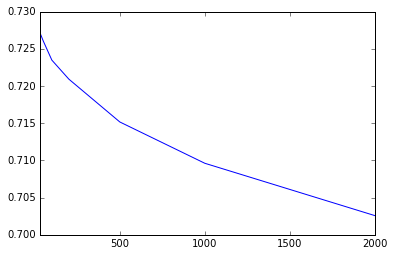

In [44]:

n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]
results=[]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

In [45]:
model.feature_importances_

array([ 0.29628844,  0.03966928,  0.00406377,  0.00226239,  0.00309861,
        0.00325423,  0.32826659,  0.04053646,  0.00496625,  0.01039457,
        0.0095957 ,  0.0021729 ,  0.00842874,  0.12529183,  0.12171025])

auto option
C-stat:  0.72715838503

None option
C-stat:  0.72715838503

sqrt option
C-stat:  0.727132241594

log2 option
C-stat:  0.727132241594

0.9 option
C-stat:  0.727199923702

0.2 option
C-stat:  0.727132241594



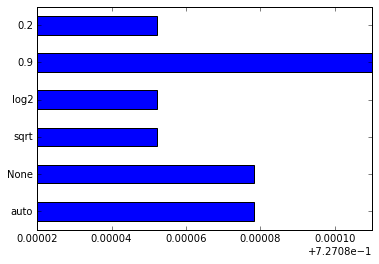

In [48]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=30, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.72710,.72719));

1 min samples
C-stat:  0.727199923702

2 min samples
C-stat:  0.72730769998

3 min samples
C-stat:  0.727455376102

4 min samples
C-stat:  0.72745415825

5 min samples
C-stat:  0.727527534066

6 min samples
C-stat:  0.727592137503

7 min samples
C-stat:  0.727589017471

8 min samples
C-stat:  0.727631925799

9 min samples
C-stat:  0.727609868394

10 min samples
C-stat:  0.72764356993

20 min samples
C-stat:  0.727819354571

50 min samples
C-stat:  0.727692376783



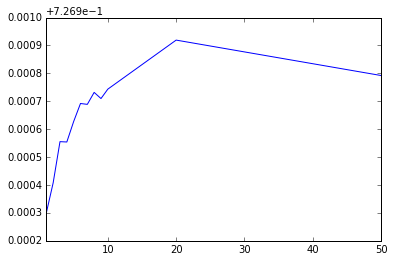

In [51]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20,50]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=30, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features=0.9, 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [52]:
model = RandomForestRegressor(n_estimators=30, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=20)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.727819354571


In [56]:

np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [60]:
y_test

,In a relationship,Married,Single
25316,0.0,0.0,1.0
5598,0.0,0.0,1.0
17418,0.0,0.0,1.0
6979,1.0,0.0,0.0
19956,0.0,1.0,0.0
25883,0.0,0.0,1.0
21858,1.0,0.0,0.0
22519,0.0,0.0,1.0
9172,1.0,0.0,0.0
26610,1.0,0.0,0.0


In [62]:

confusion_matrix(y_test,model.predict(X_test))

ValueError: Can't handle mix of multilabel-indicator and continuous-multioutput